<a href="https://colab.research.google.com/github/Mjcherono/Predicting-Disease-Spread/blob/main/dengue.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## DengAI: Predicting Disease Spread(Dengue)



### Problem Description
In cities where dengue is present, the disease is endemic. Globally, researchers estimate that dengue infects 390 million people per year ; however, only 50–100 million cases are detected due to the high asymptomatic rate . Estimating dengue burden can be problematic due to delays in case identification, strong intra- and inter-annual variation in incidence, and the majority of cases being clinically mild or asymptomatic . As a result, implementing effective vector control operations can be challenging. To overcome these issues, the development of accurate and timely early warnings systems capable of predicting future dengue incidence needs to be done.


### Determining Success Metrics.
For this project to be termed successful, if any of the models built achieve an accuracy of above 80% in prediction of total dengue cases.


### Experimental Design
*   Importing Libraries.
*   Loading dataset.
*   Data Cleaning and Preprocessing.
*   Exploratory data analysis.
*   Model Implementation.
*   Acccuracy check.





##### Libraries

In [89]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib

##### Loadding data.

In [90]:
#train

train=pd.read_csv("/content/dengue_features_train (1).csv")

In [91]:
#preview of the head

train.head(5)

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,299.8,295.9,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,300.9,296.4,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,295.434286,300.5,297.3,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,295.310000,301.4,297.0,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,301.9,297.5,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8


In [92]:
#shape

train.shape

(1456, 24)

In [93]:
#Test data

test=pd.read_csv("/content/dengue_features_test (1).csv")

In [94]:
# preview of head

test.head(5)

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,2008,18,2008-04-29,-0.0189,-0.018900,0.102729,0.091200,78.60,298.492857,298.550000,294.527143,301.1,296.4,25.37,78.781429,78.60,15.918571,3.128571,26.528571,7.057143,33.3,21.7,75.2
1,sj,2008,19,2008-05-06,-0.0180,-0.012400,0.082043,0.072314,12.56,298.475714,298.557143,294.395714,300.8,296.7,21.83,78.230000,12.56,15.791429,2.571429,26.071429,5.557143,30.0,22.2,34.3
2,sj,2008,20,2008-05-13,-0.0015,NaN,0.151083,0.091529,3.66,299.455714,299.357143,295.308571,302.2,296.4,4.12,78.270000,3.66,16.674286,4.428571,27.928571,7.785714,32.8,22.8,3.0
3,sj,2008,21,2008-05-20,NaN,-0.019867,0.124329,0.125686,0.00,299.690000,299.728571,294.402857,303.0,296.9,2.20,73.015714,0.00,15.775714,4.342857,28.057143,6.271429,33.3,24.4,0.3
4,sj,2008,22,2008-05-27,0.0568,0.039833,0.062267,0.075914,0.76,299.780000,299.671429,294.760000,302.3,297.3,4.36,74.084286,0.76,16.137143,3.542857,27.614286,7.085714,33.3,23.3,84.1


In [95]:
#shape

test.shape

(416, 24)

In [96]:
#labels

labels=pd.read_csv("/content/dengue_labels_train.csv")

In [97]:
labels.head(5)

,city,year,weekofyear,total_cases
0,sj,1990,18,4
1,sj,1990,19,5
2,sj,1990,20,4
3,sj,1990,21,3
4,sj,1990,22,6


In [98]:
labels.shape

(1456, 4)

###### Merging datasets


In [99]:
trainmerge=train.merge(labels,on=["city","year","weekofyear"],how="right")
trainmerge.shape


(1456, 25)

In [100]:
trainmerge.head(10)

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,299.8,295.9,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,300.9,296.4,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,295.434286,300.5,297.3,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,295.310000,301.4,297.0,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,301.9,297.5,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6
5,sj,1990,23,1990-06-04,NaN,0.174850,0.254314,0.181743,9.58,299.630000,299.764286,295.851429,302.4,298.1,26.49,79.891429,9.58,17.212857,2.100000,28.114286,6.942857,34.4,23.9,39.1,2
6,sj,1990,24,1990-06-11,0.112900,0.092800,0.205071,0.210271,3.48,299.207143,299.221429,295.865714,301.3,297.7,38.60,82.000000,3.48,17.234286,2.042857,27.414286,6.771429,32.2,23.3,29.7,4
7,sj,1990,25,1990-06-18,0.072500,0.072500,0.151471,0.133029,151.12,299.591429,299.528571,296.531429,300.6,298.4,30.00,83.375714,151.12,17.977143,1.571429,28.371429,7.685714,33.9,22.8,21.1,5
8,sj,1990,26,1990-06-25,0.102450,0.146175,0.125571,0.123600,19.32,299.578571,299.557143,296.378571,302.1,297.7,37.51,82.768571,19.32,17.790000,1.885714,28.328571,7.385714,33.9,22.8,21.1,10
9,sj,1990,27,1990-07-02,NaN,0.121550,0.160683,0.202567,14.41,300.154286,300.278571,296.651429,302.3,298.7,28.40,81.281429,14.41,18.071429,2.014286,28.328571,6.514286,33.9,24.4,1.1,6


Description of Dataset.


In [101]:
trainmerge.describe()

,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
count,1456.000000,1456.000000,1262.000000,1404.000000,1434.000000,1434.000000,1443.000000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,1443.000000,1446.000000,1446.000000,1413.000000,1413.000000,1436.000000,1442.000000,1434.000000,1456.000000
mean,2001.031593,26.503434,0.142294,0.130553,0.203783,0.202305,45.760388,298.701852,299.225578,295.246356,303.427109,295.719156,40.151819,82.161959,45.760388,16.746427,4.903754,27.185783,8.059328,32.452437,22.102150,39.326360,24.675137
std,5.408314,15.019437,0.140531,0.119999,0.073860,0.083903,43.715537,1.362420,1.261715,1.527810,3.234601,2.565364,43.434399,7.153897,43.715537,1.542494,3.546445,1.292347,2.128568,1.959318,1.574066,47.455314,43.596000
min,1990.000000,1.000000,-0.406250,-0.456100,-0.015533,-0.063457,0.000000,294.635714,294.892857,289.642857,297.800000,286.900000,0.000000,57.787143,0.000000,11.715714,1.357143,21.400000,4.528571,26.700000,14.700000,0.000000,0.000000
25%,1997.000000,13.750000,0.044950,0.049217,0.155087,0.144209,9.800000,297.658929,298.257143,294.118929,301.000000,293.900000,13.055000,77.177143,9.800000,15.557143,2.328571,26.300000,6.514286,31.100000,21.100000,8.700000,5.000000
50%,2002.000000,26.500000,0.128817,0.121429,0.196050,0.189450,38.340000,298.646429,299.289286,295.640714,302.400000,296.200000,27.245000,80.301429,38.340000,17.087143,2.857143,27.414286,7.300000,32.800000,22.200000,23.850000,12.000000
75%,2005.000000,39.250000,0.248483,0.216600,0.248846,0.246982,70.235000,299.833571,300.207143,296.460000,305.500000,297.900000,52.200000,86.357857,70.235000,17.978214,7.625000,28.157143,9.566667,33.900000,23.300000,53.900000,28.000000
max,2010.000000,53.000000,0.508357,0.454429,0.538314,0.546017,390.600000,302.200000,302.928571,298.450000,314.000000,299.900000,570.500000,98.610000,390.600000,20.461429,16.028571,30.800000,15.800000,42.200000,25.600000,543.300000,461.000000


In [102]:
#summary of the combined set

trainmerge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1456 entries, 0 to 1455
Data columns (total 25 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   city                                   1456 non-null   object 
 1   year                                   1456 non-null   int64  
 2   weekofyear                             1456 non-null   int64  
 3   week_start_date                        1456 non-null   object 
 4   ndvi_ne                                1262 non-null   float64
 5   ndvi_nw                                1404 non-null   float64
 6   ndvi_se                                1434 non-null   float64
 7   ndvi_sw                                1434 non-null   float64
 8   precipitation_amt_mm                   1443 non-null   float64
 9   reanalysis_air_temp_k                  1446 non-null   float64
 10  reanalysis_avg_temp_k                  1446 non-null   float64
 11  rean

the merged dataset has 1456 observations and 25 columns,2 objects, 3 integer values and 20 float columns.

In [103]:
#Checking on target variable

trainmerge.total_cases.value_counts()

0      100
6       71
3       70
5       70
2       69
      ... 
135      1
137      1
141      1
142      1
461      1
Name: total_cases, Length: 135, dtype: int64

Changing week start date to date time.

In [104]:
trainmerge.columns

Index(['city', 'year', 'weekofyear', 'week_start_date', 'ndvi_ne', 'ndvi_nw',
       'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm', 'total_cases'],
      dtype='object')

In [133]:
trainmerge['week_start_date']=pd.to_datetime(trainmerge['week_start_date'],
                                             format='%Y/%m/%d')
trainmerge.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1456 entries, 0 to 1455
Data columns (total 25 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   city                                   1456 non-null   object        
 1   year                                   1456 non-null   int64         
 2   weekofyear                             1456 non-null   int64         
 3   week_start_date                        1456 non-null   datetime64[ns]
 4   ndvi_ne                                1262 non-null   float64       
 5   ndvi_nw                                1404 non-null   float64       
 6   ndvi_se                                1434 non-null   float64       
 7   ndvi_sw                                1434 non-null   float64       
 8   precipitation_amt_mm                   1443 non-null   float64       
 9   reanalysis_air_temp_k                  1446 non-null   float64 

##### Separating entries based on cities.

In [106]:
# create new datasets
sj = trainmerge[trainmerge['city'] == 'sj']
iq = trainmerge[trainmerge['city'] == 'iq']

In [107]:
sj.shape

(936, 25)

In [108]:
iq.shape

(520, 25)

###### Checking for null values

In [109]:
#San Juan data
sj.isnull().sum()

city                                       0
year                                       0
weekofyear                                 0
week_start_date                            0
ndvi_ne                                  191
ndvi_nw                                   49
ndvi_se                                   19
ndvi_sw                                   19
precipitation_amt_mm                       9
reanalysis_air_temp_k                      6
reanalysis_avg_temp_k                      6
reanalysis_dew_point_temp_k                6
reanalysis_max_air_temp_k                  6
reanalysis_min_air_temp_k                  6
reanalysis_precip_amt_kg_per_m2            6
reanalysis_relative_humidity_percent       6
reanalysis_sat_precip_amt_mm               9
reanalysis_specific_humidity_g_per_kg      6
reanalysis_tdtr_k                          6
station_avg_temp_c                         6
station_diur_temp_rng_c                    6
station_max_temp_c                         6
station_mi

In [110]:
#Geting the percentage of missing data

sj.isnull().sum()/len(sj)*100

city                                      0.000000
year                                      0.000000
weekofyear                                0.000000
week_start_date                           0.000000
ndvi_ne                                  20.405983
ndvi_nw                                   5.235043
ndvi_se                                   2.029915
ndvi_sw                                   2.029915
precipitation_amt_mm                      0.961538
reanalysis_air_temp_k                     0.641026
reanalysis_avg_temp_k                     0.641026
reanalysis_dew_point_temp_k               0.641026
reanalysis_max_air_temp_k                 0.641026
reanalysis_min_air_temp_k                 0.641026
reanalysis_precip_amt_kg_per_m2           0.641026
reanalysis_relative_humidity_percent      0.641026
reanalysis_sat_precip_amt_mm              0.961538
reanalysis_specific_humidity_g_per_kg     0.641026
reanalysis_tdtr_k                         0.641026
station_avg_temp_c             

We wont drop any columns since it's within the threshhold.

#### Imputing missing data


In [111]:
#Imputing using forward fill.

sj.fillna(method='pad',inplace=True)
sj.isnull().sum()

city                                     0
year                                     0
weekofyear                               0
week_start_date                          0
ndvi_ne                                  0
ndvi_nw                                  0
ndvi_se                                  0
ndvi_sw                                  0
precipitation_amt_mm                     0
reanalysis_air_temp_k                    0
reanalysis_avg_temp_k                    0
reanalysis_dew_point_temp_k              0
reanalysis_max_air_temp_k                0
reanalysis_min_air_temp_k                0
reanalysis_precip_amt_kg_per_m2          0
reanalysis_relative_humidity_percent     0
reanalysis_sat_precip_amt_mm             0
reanalysis_specific_humidity_g_per_kg    0
reanalysis_tdtr_k                        0
station_avg_temp_c                       0
station_diur_temp_rng_c                  0
station_max_temp_c                       0
station_min_temp_c                       0
station_pre

In [112]:
#Iquitos data

iq.isnull().sum()

city                                      0
year                                      0
weekofyear                                0
week_start_date                           0
ndvi_ne                                   3
ndvi_nw                                   3
ndvi_se                                   3
ndvi_sw                                   3
precipitation_amt_mm                      4
reanalysis_air_temp_k                     4
reanalysis_avg_temp_k                     4
reanalysis_dew_point_temp_k               4
reanalysis_max_air_temp_k                 4
reanalysis_min_air_temp_k                 4
reanalysis_precip_amt_kg_per_m2           4
reanalysis_relative_humidity_percent      4
reanalysis_sat_precip_amt_mm              4
reanalysis_specific_humidity_g_per_kg     4
reanalysis_tdtr_k                         4
station_avg_temp_c                       37
station_diur_temp_rng_c                  37
station_max_temp_c                       14
station_min_temp_c              

In [113]:
#checking on percentages 
iq.isnull().sum()/len(iq)*100

city                                     0.000000
year                                     0.000000
weekofyear                               0.000000
week_start_date                          0.000000
ndvi_ne                                  0.576923
ndvi_nw                                  0.576923
ndvi_se                                  0.576923
ndvi_sw                                  0.576923
precipitation_amt_mm                     0.769231
reanalysis_air_temp_k                    0.769231
reanalysis_avg_temp_k                    0.769231
reanalysis_dew_point_temp_k              0.769231
reanalysis_max_air_temp_k                0.769231
reanalysis_min_air_temp_k                0.769231
reanalysis_precip_amt_kg_per_m2          0.769231
reanalysis_relative_humidity_percent     0.769231
reanalysis_sat_precip_amt_mm             0.769231
reanalysis_specific_humidity_g_per_kg    0.769231
reanalysis_tdtr_k                        0.769231
station_avg_temp_c                       7.115385


Equally no dropping of columns they are all below 20%

Filling missing values in Iquitos data.

In [114]:
#Imputed for missing values using forward fill method.

iq.fillna(method='pad', inplace=True)
iq.isnull().sum()

city                                     0
year                                     0
weekofyear                               0
week_start_date                          0
ndvi_ne                                  0
ndvi_nw                                  0
ndvi_se                                  0
ndvi_sw                                  0
precipitation_amt_mm                     0
reanalysis_air_temp_k                    0
reanalysis_avg_temp_k                    0
reanalysis_dew_point_temp_k              0
reanalysis_max_air_temp_k                0
reanalysis_min_air_temp_k                0
reanalysis_precip_amt_kg_per_m2          0
reanalysis_relative_humidity_percent     0
reanalysis_sat_precip_amt_mm             0
reanalysis_specific_humidity_g_per_kg    0
reanalysis_tdtr_k                        0
station_avg_temp_c                       0
station_diur_temp_rng_c                  0
station_max_temp_c                       0
station_min_temp_c                       0
station_pre

##### Duplicated Values


In [115]:
#duplicated on Iquitos

iq.duplicated().sum()

0

In [116]:
#duplicated on san juan

sj.duplicated().sum()

0

In [117]:
sj.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,299.8,295.9,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,300.9,296.4,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,295.434286,300.5,297.3,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,295.310000,301.4,297.0,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,301.9,297.5,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6


#### Outliers

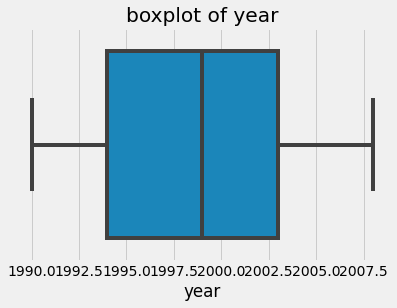

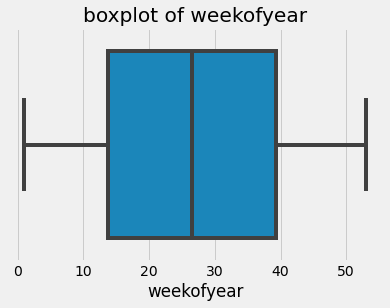

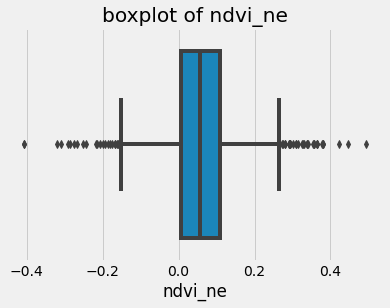

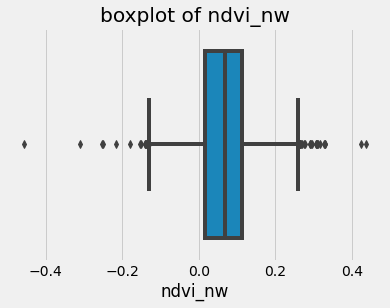

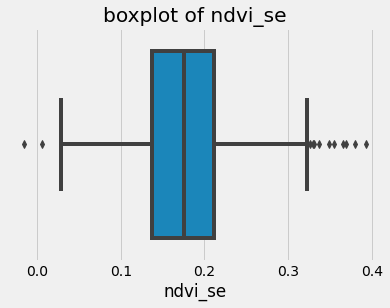

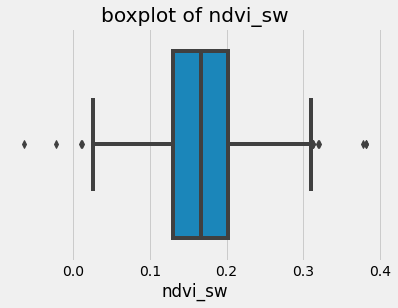

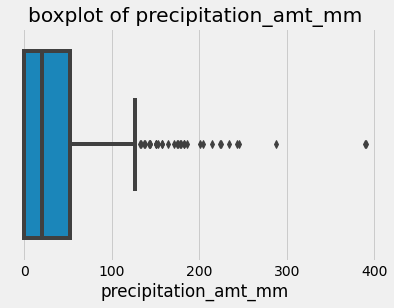

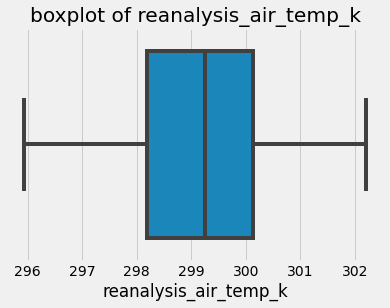

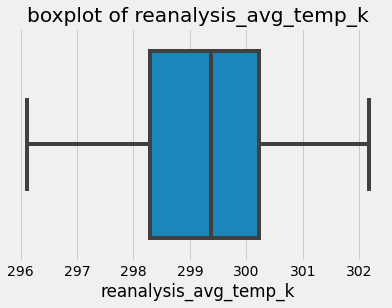

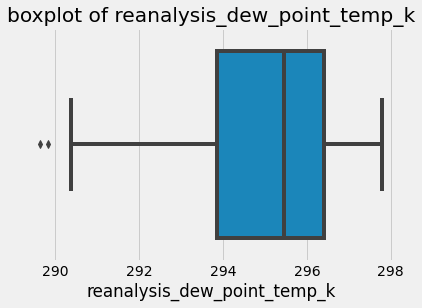

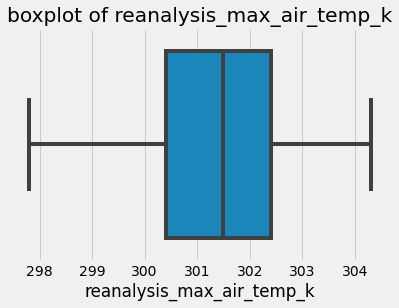

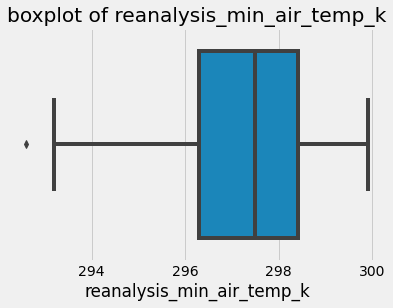

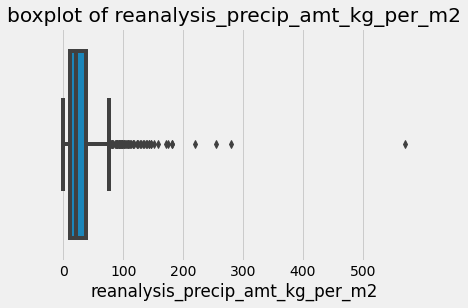

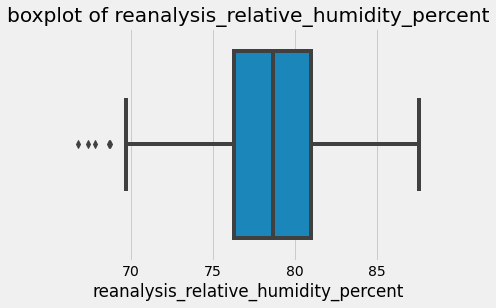

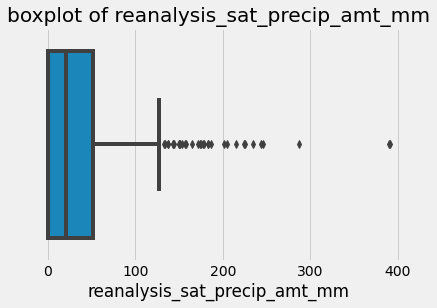

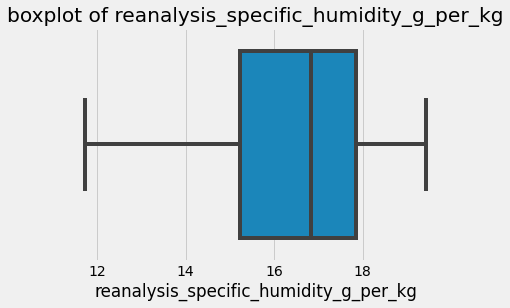

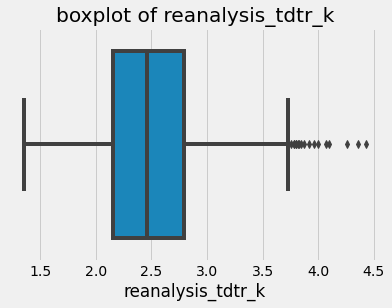

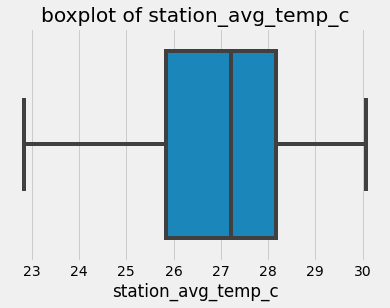

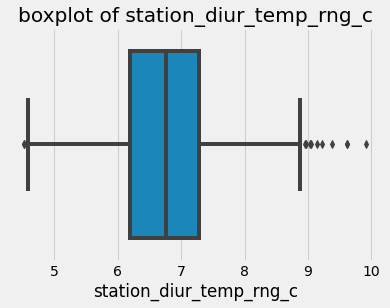

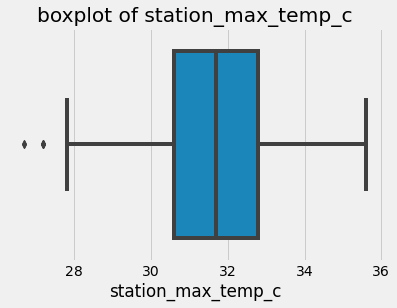

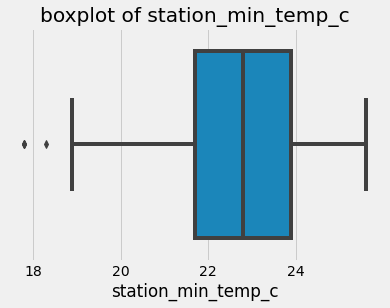

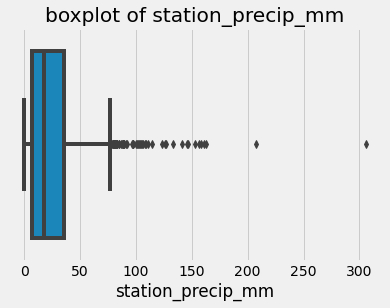

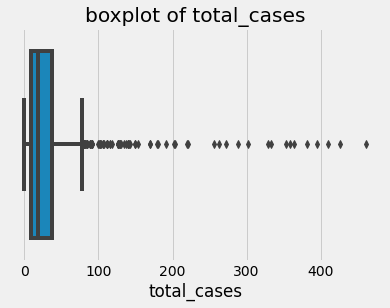

In [118]:
#Numeric features
sj_num = sj.drop(['city','week_start_date'],axis=1)

colnames = list(sj_num.columns)
for i in colnames:
    plt.title(f'boxplot of {i}')
    sns.boxplot(sj_num[i])
    plt.show()



*   The outliers on NDVI columns won't be gotten rid of since they indicate areas with extreme cases in terms of vegetation cover. That at 0 and below corresponds to barren areas of rock or sand/ snow .Moderate values where the interquatile range is at represents shrubs and grasslands while high values represent temperature and tropical rainforests.
*   List item



Description of data


In [119]:
print(sj.describe())
print(iq.describe())

              year  weekofyear  ...  station_precip_mm  total_cases
count   936.000000  936.000000  ...         936.000000   936.000000
mean   1998.826923   26.503205  ...          26.756838    34.180556
std       5.212076   15.021909  ...          29.264050    51.381372
min    1990.000000    1.000000  ...           0.000000     0.000000
25%    1994.000000   13.750000  ...           6.875000     9.000000
50%    1999.000000   26.500000  ...          17.650000    19.000000
75%    2003.000000   39.250000  ...          35.350000    37.000000
max    2008.000000   53.000000  ...         305.900000   461.000000

[8 rows x 23 columns]
              year  weekofyear  ...  station_precip_mm  total_cases
count   520.000000  520.000000  ...         520.000000   520.000000
mean   2005.000000   26.503846  ...          61.581346     7.565385
std       2.918283   15.029450  ...          62.968520    10.765478
min    2000.000000    1.000000  ...           0.000000     0.000000
25%    2002.750000   13.7

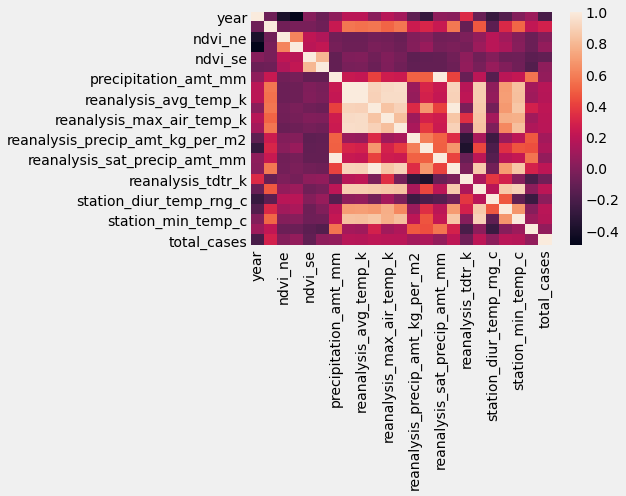

In [120]:
# San Juan
data_corr = sj.corr()
sns.heatmap(data_corr)

#sns.heatmap(sj.corr()**2)




*   The reanalysis temperature variables are strongly correlated in San Juan.
*   Apparently total number of dengue cases has no correlation with any feature.





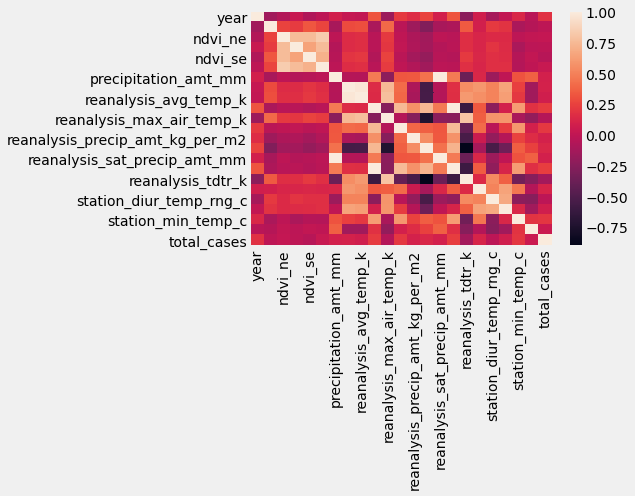

In [121]:
#Iquitos
data_corr2 = iq.corr()
sns.heatmap(data_corr2)

*   There is a correlation in NVDI for north east and south east in Iquitos.
*   Similarly withthe total number of cases at Iquitos there is no correlation.



In [122]:
# create mean NVDI for each week for each city
sj['nvdi_mean'] = sj[sj.columns[3:7]].mean(axis = 1)
iq['nvdi_mean'] = iq[iq.columns[3:7]].mean(axis = 1)

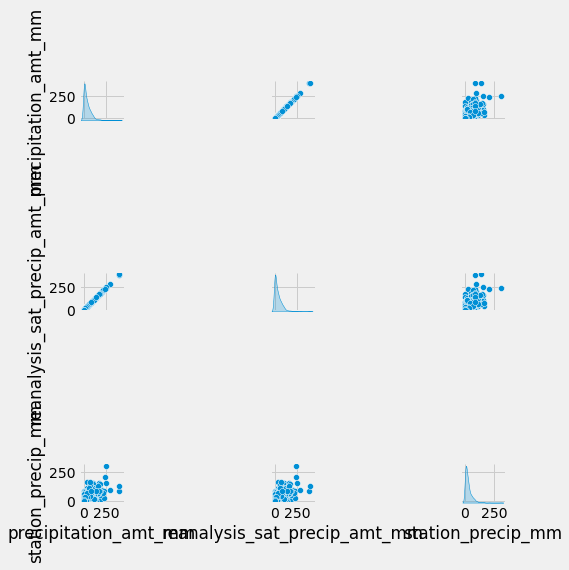

In [123]:
sns.pairplot(sj[["precipitation_amt_mm", "reanalysis_sat_precip_amt_mm", "station_precip_mm"]], diag_kind="kde")


In [124]:
sj.head(5)

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases,nvdi_mean
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,299.8,295.9,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4,0.141603
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,300.9,296.4,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5,0.158144
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,295.434286,300.5,297.3,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4,0.120806
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,295.310000,301.4,297.0,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3,0.200419
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,301.9,297.5,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6,0.236533


Span of years.

In [126]:
sj['week_start_date'].min(),sj['week_start_date'].max()

(Timestamp('1990-04-30 00:00:00'), Timestamp('2008-04-22 00:00:00'))

Precipitation in amounts over the years(1990-2008)

In [127]:
sj1 = sj.groupby('week_start_date')['precipitation_amt_mm'].sum().reset_index()
sj1 = sj1.set_index('week_start_date')
sj1.index

DatetimeIndex(['1990-04-30', '1990-05-07', '1990-05-14', '1990-05-21',
               '1990-05-28', '1990-06-04', '1990-06-11', '1990-06-18',
               '1990-06-25', '1990-07-02',
               ...
               '2008-02-19', '2008-02-26', '2008-03-04', '2008-03-11',
               '2008-03-18', '2008-03-25', '2008-04-01', '2008-04-08',
               '2008-04-15', '2008-04-22'],
              dtype='datetime64[ns]', name='week_start_date', length=936, freq=None)

In [128]:
d =sj1['precipitation_amt_mm'].resample('MS').mean()
d['1990':]

week_start_date
1990-04-01    12.4200
1990-05-01    20.0600
1990-06-01    45.8750
1990-07-01    28.9980
1990-08-01    48.2225
               ...   
2007-12-01    27.8150
2008-01-01    23.6920
2008-02-01     0.0000
2008-03-01     6.7975
2008-04-01     5.1950
Freq: MS, Name: precipitation_amt_mm, Length: 217, dtype: float64

Visualize precipitation amounts in San Juan

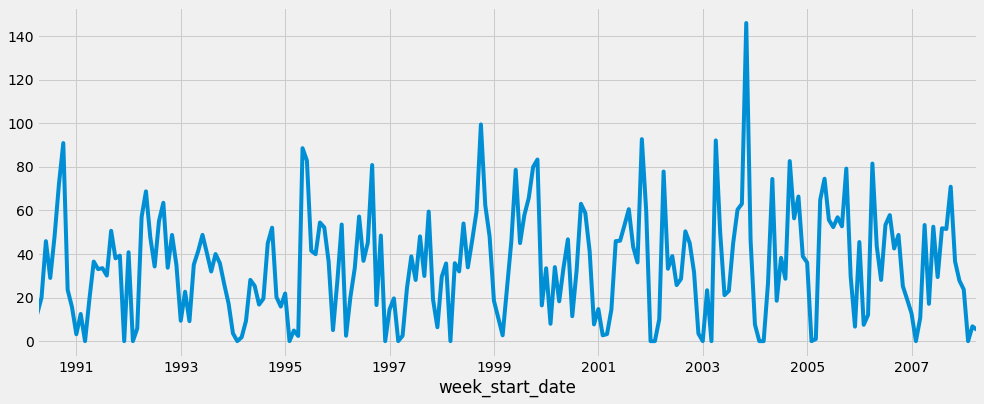

In [129]:
d.plot(figsize=(15, 6))
plt.show()

Text(0, 0.5, 'total cases')

<Figure size 432x288 with 0 Axes>

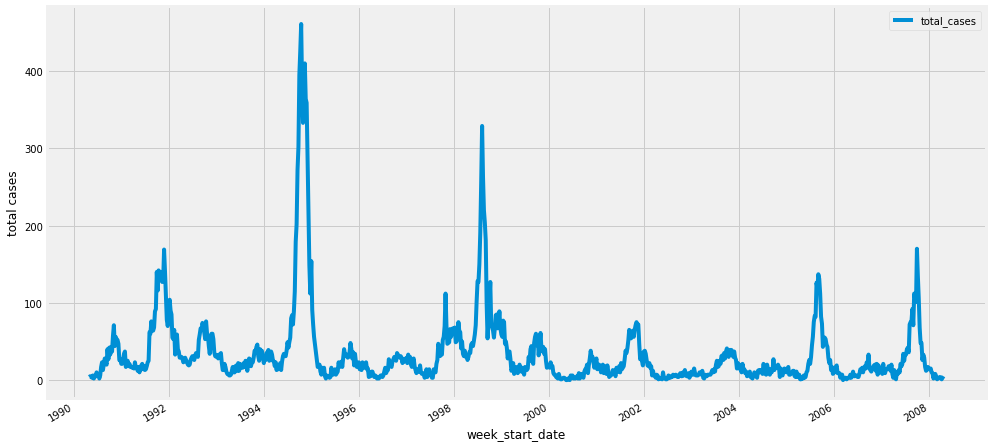

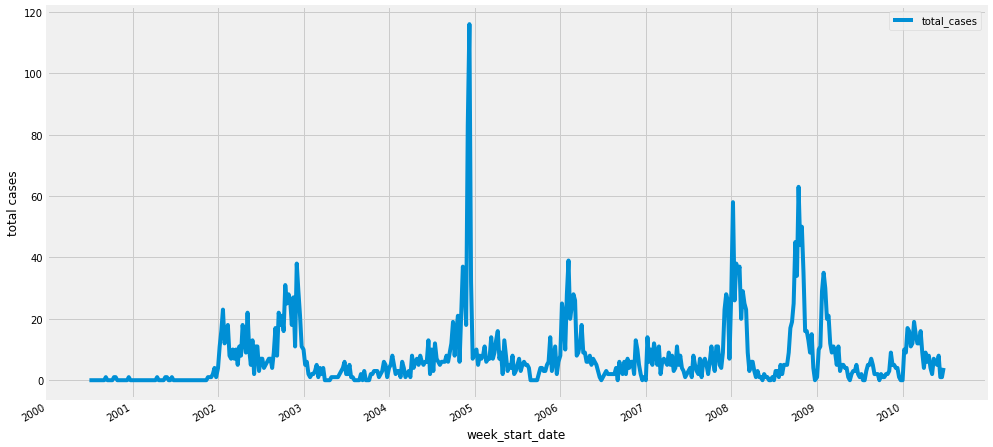

In [139]:
%matplotlib inline

plt.figure()
ax = sj[['week_start_date', 'total_cases']].plot('week_start_date', figsize=(15,8))
#ax.set_index('week_start_date',inplace=True, drop=True)
##ax.index = pd.to_datetime(ax.index)
ax1 = iq[['week_start_date', 'total_cases']].plot('week_start_date', figsize=(15,8))
ax.set_ylabel('total cases')
ax1.set_ylabel('total cases')

**San Juan**

From June 1994 to May 1995, a very high number of dengue cases was recorded in San Juan, Puerto Rico. This epidemic produced the largest number of hospitalizations.

Also at the onset of 1999 there was relatively high reports of cases of people that were infected with Dengue.


**Iquitos.**

There was a high recording of dengue cases in Iquitos at the end of 2004 approaching 2005 and later rose between 2008 and 2009.[link text](https://www.researchgate.net/figure/Dengue-epidemics-overlaid-to-illustrate-shifting-of-peak-incidence-The-epidemics-are_fig10_264009350)


In [140]:
sj.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases,nvdi_mean
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,299.8,295.9,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4,0.141603
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,300.9,296.4,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5,0.158144
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,295.434286,300.5,297.3,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4,0.120806
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,295.310000,301.4,297.0,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3,0.200419
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,301.9,297.5,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6,0.236533


In [144]:
sj_new = sj.copy()
iq_new = iq.copy()

#### NVDI-Vegetation cover

Finding the mean of vegetation for each week in the four quadrants.(NE,NW,SE,SW)

Since the for features represent the different parts of the city(San Juan) we can as well get an average of vegetation cover per week.

In [145]:
# creating the  mean NVDI for each week for each city
sj_new['nvdi_mean'] = sj_new[sj_new.columns[4:8]].mean(axis = 1)
iq_new['nvdi_mean'] = iq_new[iq_new.columns[4:8]].mean(axis = 1)

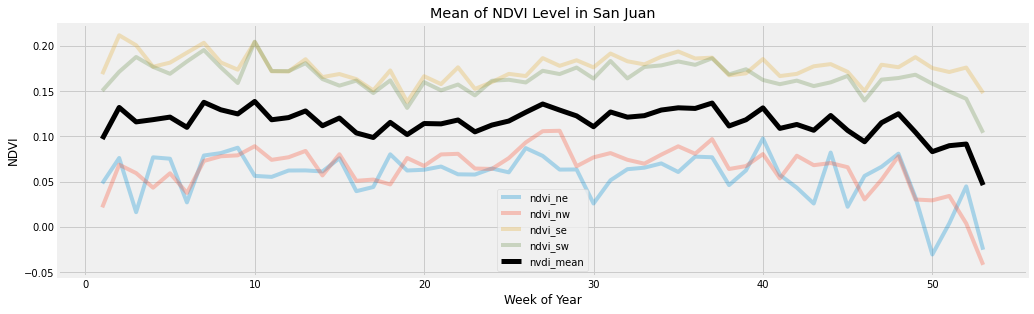

In [157]:
# plot week by week average vegetation for San Juan
fig, ax = plt.subplots(2, 1, figsize=(15, 5))

plt.subplot()
for name in sj_new.columns[4:8]:
  sj_new.groupby('weekofyear')[name].mean().plot(alpha = .3)
sj_new.groupby('weekofyear')['nvdi_mean'].mean().plot(alpha = 1, c = 'k', linewidth = 5) 
plt.title('Mean of NDVI Level in San Juan')
plt.xlabel('Week of Year')
plt.ylabel('NDVI')
plt.legend(loc = 'best')
plt.tight_layout(pad=3)
